# Costa Rican household Poverty prediction
## https://www.kaggle.com/c/costa-rican-household-poverty-prediction/overview

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Have a look at the data

#### 1.) Have a look at the train data

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


<B>Finding</B>: Target variable is the one to predict

In [3]:
df_train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1




#### 2.) Check the meaning of the variables in the codebook


In [4]:
df_codebook=pd.read_csv('codebook.csv')
df_codebook=pd.read_excel('codebook.xlsx')
df_codebook

,Variable name,Variable description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has toilet in the household
5,refrig,=1 if the household has refrigerator
6,v18q,owns a tablet
7,v18q1,number of tablets household owns
8,r4h1,Males younger than 12 years of age
9,r4h2,Males 12 years of age and older


Finding: </BR>
ID column is not specified. </BR>
SQBxxxxx do not seem to bring new information as they are contained already

investigate further the SBQ variables

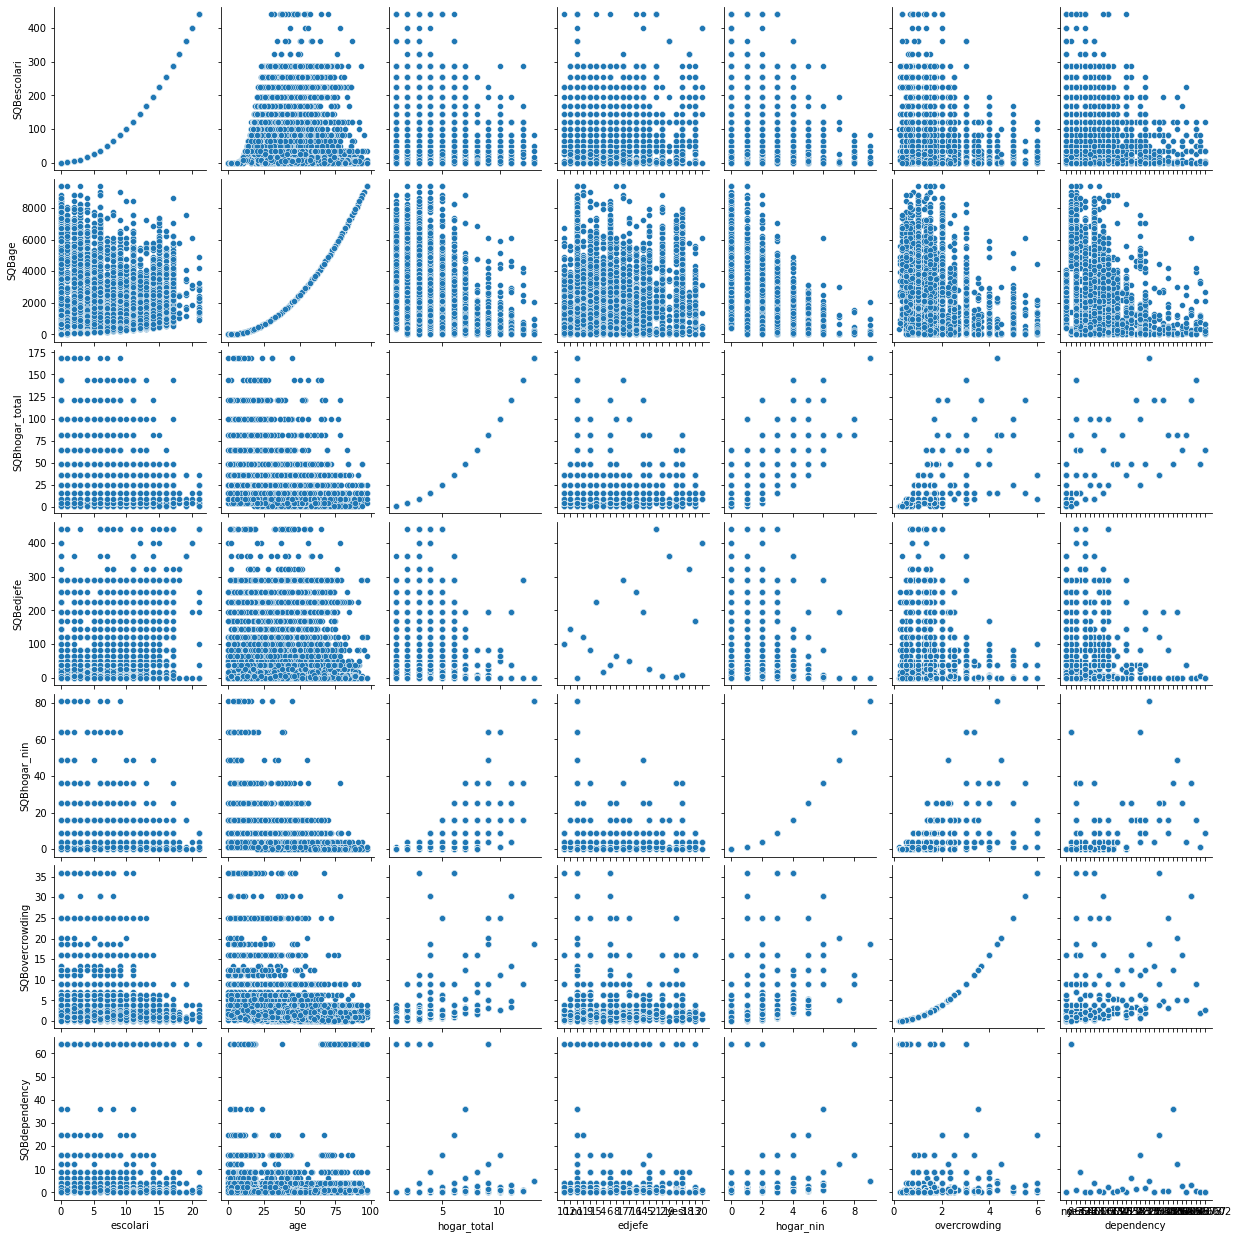

In [5]:
import seaborn as sns

SQBcolumns=list(df_codebook.loc[df_codebook['Variable name'].str.contains('SQB'),'Variable name'])
SQBcolumns.remove('SQBmeaned') #meaned is not contained in columns so dont keep it for investigations
yvars=SQBcolumns
xvars=[i[3:] for i in SQBcolumns]
SQBcolumns=SQBcolumns+xvars #investigate columns and corresponding SQBcolumns
sns.pairplot(df_train.loc[:,SQBcolumns],x_vars=xvars,y_vars=yvars)


<B>Finding:</B>: all variables have the squared dependency between their SQB relatives. Exception is edjefe! So some other information may be contained there
that could be useful. Keep the SQBejefe!
Useful step could be to implement a custom transformer that does the job in the pipeline later (train and test)

#### Create a transformer to make it possible to include column drop in the pipeline later

In [6]:
!pip install sklearn

In [50]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class FranksTransformer_Dropper(BaseEstimator,TransformerMixin):
    def __init__(self,do_copy=True,additional_columns=[]):
        #important: df_codebook needs to be filled before
        #the transformer drops all columns starting with SQB, 
        self.additional_columns=additional_columns
        self.do_copy=do_copy
        print("Franks Transformer Dropper")
        self.SQBcolumns=list(df_codebook.loc[df_codebook['Variable name'].str.contains('SQB'),'Variable name'])
        self.SQBcolumns.remove('SQBmeaned') #meaned is not contained in columns so dont keep it for investigations
        self.SQBcolumns.remove('SQBedjefe')
        for i in self.additional_columns:
            print(i)
            self.SQBcolumns.append(i)
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        print("Franks Transformer Dropper: transforming")
        self._X=X.copy()
        try:
            self._X.drop(columns=self.SQBcolumns,inplace=True,errors='ignore')
            print("Franks Transformer Dropper: SQcolumns dropped")
        except Exception as exc:
            print("Franks Transformer Dropper: Dropping not possible - maybe already dropped")
            print("{}".format(exc))
            print("{}".format(self._X))
        return self._X



##### Testing the new transformer

In [8]:
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

drop_columns=FranksTransformer_Dropper(do_copy=True,additional_columns=['Id'])
pipeline = Pipeline([('dropper',drop_columns)])
   
pipeline.fit(df_train)
_y=pipeline.transform(df_train)
_y

Franks Transformer Dropper
Franks Transformer Dropper: transforming
Franks Transformer Dropper: SQcolumns dropped


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBedjefe,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,100.0000,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,144.0000,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,0,121.0000,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,121,121.0000,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,9,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6c086aa3,1,4,0,5,.25,9,no,8.25,0,0,0,1,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,46,81,68.0625,2116,2
9553,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,0,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,d6c086aa3,1,4,0,5,.25,9,no,8.25,1,0,0,

3.) Examine the test data available

In [9]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [10]:
df_test.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,4203.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,1.980508,0.389168,1.656522,2.045691,0.805709,3.220490,4.026199,4.021756,4.140426,7.214914,0.425172,4.021756,0.588741,0.077171,0.201375,0.008300,0.107017,0.014462,0.001677,0.001258,0.692740,0.234029,0.001761,0.000126,0.013456,0.057889,0.971538,0.018989,0.002138,0.001425,0.669559,0.962274,0.032487,0.005240,0.879527,0.000503,0.003856,0.114940,0.003647,0.225394,0.753060,0.016055,0.001844,0.002222,0.476861,0.476903,0.044014,0.875419,0.034708,0.086058,0.001677,0.000168,0.001970,0.111460,0.322938,0.565602,0.127222,0.307596,0.565183,0.102490,0.270540,0.62697,0.056757,0.490401,0.509599,0.137827,0.123198,0.273265,0.035924,0.058811,0.033409,0.337567,0.307428,0.187500,0.384809,0.013665,0.008426,0.049212,0.009809,0.003228,0.012617,0.002767,0.012701,0.007839,1.412559,2.609197,0.295146,4.0

<B>Finding:</B> df_test behaves like df_train

#### Investigate where we have null values

In [11]:
a=pd.isnull(df_train)
null_df=[(i,a.loc[a[i]==True,i].count()) for i in a.columns]
#print(null_df)
print('Where are the values null')
for k,l in null_df:
    if l>0:
        text=list(df_codebook.loc[df_codebook.iloc[:,0]==k,'Variable description'])[0]
        print('{text}:{k} -> {l}'.format(text=text,k=k,l=l))

Where are the values null
Monthly rent payment:v2a1 -> 6860
number of tablets household owns:v18q1 -> 7342
Years behind in school:rez_esc -> 7928
average years of education for adults (18+):meaneduc -> 5
meaned squared:SQBmeaned -> 5


##### How balanced is the data

In [12]:
b=df_train.groupby('Target').count() #we can look at id column that has no nulls
b

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,755,153,755,755,755,755,755,755,60,755,755,755,755,755,755,755,755,755,755,755,755,188,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755
2,1597,337,1597,1597,1597,1597,1597,1597,125,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,393,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597
3,1209,300,1209,1209,1209,1209,1209,1209,143,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,255,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209
4,5996,1907,5996,5996,5996,5996,5996,5996,1887,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,793,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996,5996

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [14]:
df_train.groupby('Target').describe()

v2a1                                                                                  hacdor                                                rooms                                                hacapo                                                 v14a                                               refrig                                                 v18q                                                v18q1                                                 r4h1                                                 r4h2                                                 r4h3                                                 r4m1                                                 r4m2                                                 r4m3                                                 r4t1                                                 r4t2                                                  r4t3                                                tamhog                                          \
         count           mean            std      min       25%       50%       75%        max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%   max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%   max   count      mean       std  min  25%  50%  75%   max   count      mean       std  min  25%  50%  75%   
Target                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1        153.0   84806.464052   51955.287818      0.0   50000.0   80000.0  100000.0   249896.0   755.0  0.147020  0.354360  0.0  0.0  0.0  0.0  1.0   755.0  4.327152  1.260601  1.0  4.0  4.0  5.0   8.0   755.0  0.075497  0.264366  0.0  0.0  0.0  0.0  1.0   755.0  0.988079  0.108600  0.0  1.0  1.0  1.0  1.0   755.0  0.887417  0.316292  0.0  1.0  1.0  1.0  1.0   755.0  0.079470  0.270651  0.0  0.0  0.0  0.0  1.0    60.0  1.733333  1.006195  1.0  1.0  1.0  2.0  4.0   755.0  0.796026  1.041950  0.0  0.0  0.0  1.0  5.0   755.0  1.160265  0.852215  0.0  1.0  1.0  2.0  3.0   755.0  1.956291  1.314860  0.0  1.0  2.0  3.0  7.0   755.0  0.800000  0.914661  0.0  0.0  1.0  1.0  3.0   755.0  1.701987  1.003936  0.0  1.0  1.0  2.0  5.0   755.0  2.501987  1.491242  0.0  1.0  2.0  3.0  7.0   755.0  1.596026  1.547561  0.0  0.0  1.0  2.0  7.0   755.0  2.862252  1.280166  1.0  2.0  3.0  4.0   6.0   755.0  4.458278  2.237087  1.0  3.0  4.0  5.0  13.0   755.0  4.455629  2.239406  1.0  3.0  4.0  5.0   
2        337.0   97015

<B>Finding</B>: Most data is available for class 4 - the poorest - class 1 are the smallest population in the dataset

In [15]:
df_train.loc[(df_train['v2a1']>0.0)==True,:]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.0000,121.0000,1444,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,9,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6c086aa3,1,4,0

In [16]:
#Monthly rent payment:v2a1
b['v2a1']/b['Id']*100

Target
1    20.264901
2    21.102066
3    24.813896
4    31.804536
dtype: float64

In [17]:
#number of tablets household owns:v18q1 
b['v18q1']/b['Id']*100

Target
1     7.947020
2     7.827176
3    11.827957
4    31.470981
dtype: float64

In [18]:
#Years behind in school:rez_esc
b['rez_esc']/b['Id']*100 

Target
1    24.900662
2    24.608641
3    21.091811
4    13.225484
dtype: float64

<B>Finding:</B> the extreme poverty has the lowest number of datasets. This is dangerous for a good prediction.
Missing data seems to correllated to the level of poverty. Introduce those columns as new columns in train. Do this as a transformer that it can be inlcuded in the pipeline later

##### Create a transformer to add _na columns and fill them with Boolean values

In [19]:
# in an optimal implementation the columns found in the fit function would be passed as parameters to the transformer, but this is a small project work only...
class FranksTransformer_NaColumns(BaseEstimator,TransformerMixin):
    def __init__(self,do_copy=True):
        #important: codebook needs to be filled before
        print("Franks Transformer NaColumns")
        self.do_copy=do_copy
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        print("Franks Transformer NaColumns: transforming")
        self._X=X.copy()
        try:
            for i in ['v18q1','rez_esc','v2a1']:
                self._X.loc[self._X[i].isna()==True,i+'_na']=True
                self._X.loc[self._X[i].isna()==False,i+'_na']=False            
            print("Franks Transformer NaColumns: New columns appended")
        except Exception as exc:
            print("Franks Transformer NaColumns: something went wrong maybe") 
            print("{}".format(exc))
        return self._X


.... and test it

In [43]:
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

na_columns=FranksTransformer_NaColumns(do_copy=True)
pipeline = Pipeline([('nacolumns',na_columns)])
   
pipeline.fit(df_train)
_X=pipeline.transform(df_train)
display(_X)
df_train

Franks Transformer NaColumns
Franks Transformer NaColumns: transforming
Franks Transformer NaColumns: New columns appended


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,v18q1_na,rez_esc_na,v2a1_na
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4,True,True,False
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4,False,True,False
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4,True,True,True
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4,False,False,False
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,9,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,9,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6c086aa3,1,4,0,5,.25,9,

use the transformed test to look for the numbers in the different categories 

In [ ]:
na_columns=['v18q1_na','rez_esc_na','v2a1_na']
na_columns=['v18q1_na','rez_esc_na','v2a1_na','Target']
c=_X.groupby(na_columns).count()[['Id']]
c

#### Have a look at the data to get an impression there

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

num=50
fig,axis = plt.subplots(num,figsize=(18,50))
for i in range(0,num):
    axis[i].set_ylabel(list(df_train.columns)[i])
    axis[i].plot(df_train[list(df_train.columns)[i]])


### Simply try it with light gbm to get an impression

In [ ]:
! pip install lightgbm #needs brew install lightgbm on macos

A bit of documentation helps sometimes so display it

In [21]:
import  copy
import lightgbm
? lightgbm.LGBMClassifier?

Init signature:
lightgbm.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,
    importance_type='split',
    **kwargs,
)
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree de

In [22]:
import lightgbm
model = lightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, 
                                n_estimators=500, subsample_for_bin=20000, objective='multiclass', 
                                subsample=1.0, subsample_freq=0, colsample_bytree=1.0, 
                                n_jobs=- 1, silent=True, importance_type='split')


#### The LGBMClassifier does not like all the data so investigate the data types that it doesn't like (objects) and prepare an encoder for those ones

In [23]:
wrong_otypes=[]
for i in list(df_train.columns):
    if df_train[i].dtype=='O':
        print("{} -> {}".format(i,df_train[i].unique()))
        wrong_otypes.append(i)
print("=========")
wrong_otypes

Id -> ['ID_279628684' 'ID_f29eb3ddd' 'ID_68de51c94' ... 'ID_85fc658f8'
 'ID_ced540c61' 'ID_a38c64491']
idhogar -> ['21eb7fcc1' '0e5d7a658' '2c7317ea8' ... 'a8eeafc29' '212db6f6c'
 'd6c086aa3']
dependency -> ['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
edjefe -> ['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
edjefa -> ['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']

#### Same transformation needs to be done later on the test-set. need to have something that does the analysis also on the test set. 
Category encoder looks nice - so install it if needed

In [24]:
!pip install category_encoders

In [52]:
from copy import copy
import category_encoders as ce

class FranksTransformer_Encoder(BaseEstimator,TransformerMixin):
    def __init__(self,wrong_otypes=[#'idhogar',
                                    'dependency','edjefe','edjefa','v18q1_na','rez_esc_na','v2a1_na']):
        self.wrong_otypes=wrong_otypes
        print("Franks Transformer Encoder")
        
    def fit(self,X,y=None):
        try:
            self.encoder = ce.OrdinalEncoder(cols=self.wrong_otypes)
            self.encoder.fit(X,y)
            print("Franks Transformer Encoder: Columns encoded")
        except Exception as exc:
            print("Franks Transformer Encoder: something went wrong maybe")
            print("{}".format(exc))
        return self
    
    def transform(self,X,y=None):
        print("Franks Transformer Encoder: transforming")
        return self.encoder.transform(X)


#### Can't wait to see something - so try it out

In [26]:
from sklearn.model_selection import train_test_split
from copy import copy
import category_encoders as ce

X, y = df_train.drop('Target', axis=1), df_train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#encoder = ce.BackwardDifferenceEncoder(cols=[...])
#encoder = ce.BaseNEncoder(cols=[...])
#encoder = ce.BinaryEncoder(cols=[...])
#encoder = ce.CatBoostEncoder(cols=[...])
#encoder = ce.CountEncoder(cols=[...])
#encoder = ce.GLMMEncoder(cols=[...])
#encoder = ce.HashingEncoder(cols=[...])
#encoder = ce.HelmertEncoder(cols=[...])
#encoder = ce.JamesSteinEncoder(cols=[...])
##encoder = ce.LeaveOneOutEncoder(cols=[...])
#encoder = ce.MEstimateEncoder(cols=[...])
#encoder = ce.OneHotEncoder(cols=[...])
#encoder = ce.SumEncoder(cols=[...])
#encoder = ce.PolynomialEncoder(cols=[...])
#encoder = ce.TargetEncoder(cols=[...])
#encoder = ce.WOEEncoder(cols=[...])
encoder = ce.OrdinalEncoder(cols=wrong_otypes)

encoder.fit(X, y)
X_cleaned = encoder.transform(X_train)

clf = copy(model)
clf.fit(X_cleaned,y_train)


/Users/lacherf/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


LGBMClassifier(n_estimators=500, objective='multiclass',
               subsample_for_bin=20000)

##### Check how the transformed data set looks like

In [27]:
X_cleaned

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
6503,6504,NaN,0,5,0,1,1,0,NaN,0,1,1,0,2,2,0,3,3,3,3,12,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2032,0,3,1,3,5,3,12,10.000000,0,0,0,0,0,0,1,0,0,3,1.000000,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,22,144,484,9,0,0,1.000000,0.25,100.000000,484
2841,2842,120000.0,0,4,0,1,1,0,NaN,1,1,2,1,3,4,2,4,6,6,6,9,NaN,6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,911,3,3,0,6,3,8,1,9.666667,0,0,0,0,0,1,0,0,0,2,3.000000,0,0,1,0,0,0,0,1,4,1,0,0,0,0,0,1,0,46,81,2116,36,36,9,9.000000,1.00,93.444450,2116
5153,5154,NaN,0,6,0,1,1,0,NaN,1,2,3,0,3,3,1,5,6,6,6,5,0.0,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1611,3,3,0,6,3,8,1,8.000000,0,1,0,0,0,0,0,0,0,3,2.000000,1,0,0,0,0,0,0,1,5,1,0,0,0,0,0,0,1,11,25,121,36,36,9,4.000000,1.00,64.000000,121
4772,4773,NaN,0,5,0,1,1,0,NaN,1,3,4,0,2,2,1,5,6,6,6,6,NaN,6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1492,2,4,0,6,5,9,1,6.500000,0,0,1,0,0,0,0,0,0,3,2.000000,0,0,0,0,1,0,0,1,4,1,0,0,0,0,0,1,0,20,36,400,36,64,4,4.000000,0.25,42.250000,400
9183,9184,NaN,0,5,0,1,1,0,NaN,0,1,1,0,1,1,0,2,2,2,2,6,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2872,0,2,1,2,3,3,12,6.000000,0,0,1,0,0,0,0,0,0,3,0.666667,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,64,36,4096,4,0,0,0.444444,1.00,36.000000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,417,300000.0,0,5,0,1,1,1,2.0,0,1,1,1,2,3,1,3,4,4,4,0,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,133,2,2,0,4,3,3,1,5.500000,0,0,0,0,0,0,0,1,0,3,1.333333,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,34,0,1156,16,0,4,1.777778,1.00,30.250000,1156
5

##### Now predict some data and check the quality with the confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, f1_score, accuracy_score,\
                            roc_auc_score, average_precision_score, precision_recall_curve, auc,\
                            roc_curve, precision_score, recall_score


X_ttest=encoder.transform(X_test)
y_pred = clf.predict(X_ttest)
confusion = confusion_matrix(y_test, y_pred)
print("F1-Score macro: {}".format(f1_score(y_test,y_pred,average='macro')))
df_conf = pd.DataFrame(confusion,columns=['1','2','3','4'],index=['1','2','3','4'])
print("values on train data")
df_conf

F1-Score macro: 0.9214924708215361
values on train data


,1,2,3,4
1,126,12,2,5
2,5,261,14,18
3,0,10,221,14
4,0,6,7,1211


Check what influence the new _na columns have on the prediction

In [29]:
X_ttest.drop(columns=['v18q1_na','rez_esc_na','v2a1_na'],inplace=True,errors='ignore')
X_cleaned = encoder.transform(X_train)
X_cleaned.drop(columns=['v18q1_na','rez_esc_na','v2a1_na'],inplace=True,errors='ignore')
clf = copy(model)
clf.fit(X_cleaned,y_train)

LGBMClassifier(n_estimators=500, objective='multiclass',
               subsample_for_bin=20000)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, f1_score, accuracy_score,\
                            roc_auc_score, average_precision_score, precision_recall_curve, auc,\
                            roc_curve, precision_score, recall_score


#X_ttest=encoder.transform(X_test)
y_pred = clf.predict(X_ttest)
confusion = confusion_matrix(y_test, y_pred)
print("F1-Score macro: {}".format(f1_score(y_test,y_pred,average='macro')))
df_conf = pd.DataFrame(confusion,columns=['1','2','3','4'],index=['1','2','3','4'])
print("values on train data")
df_conf

F1-Score macro: 0.9214924708215361
values on train data


,1,2,3,4
1,126,12,2,5
2,5,261,14,18
3,0,10,221,14
4,0,6,7,1211


#### Count how many predictions are wrong and right

In [31]:
diff_array=[ 1 if i==True else 0 for i in (((y_test.to_numpy()-y_pred)!=0)==True)]
wrong=sum(diff_array)
right=len(diff_array)-wrong
print("wrong prediction: {wrong}\nright prediction: {right}".format(wrong=wrong,right=right))

wrong prediction: 93
right prediction: 1819


#### Conclusion: Doesn't look so bad in general. _na parameters do not help improving the results,significantly 

#### Check for the most important features

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

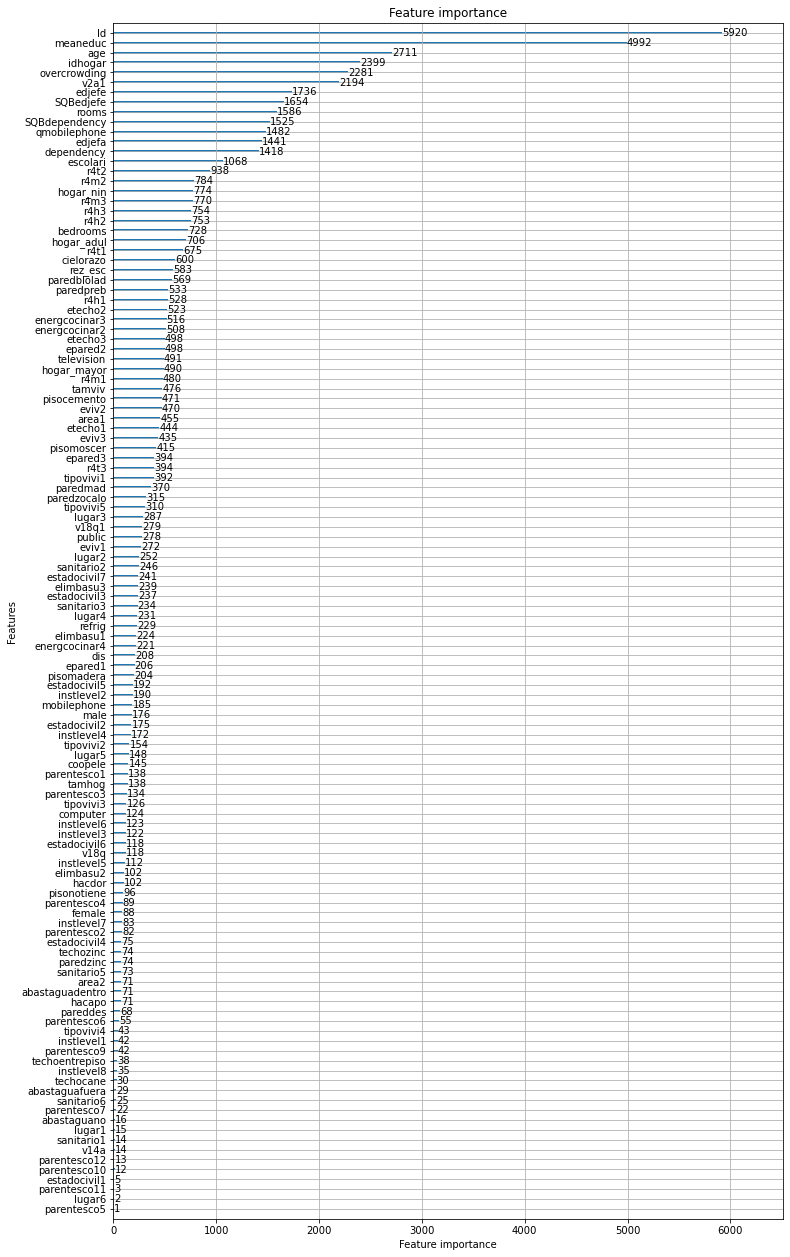

In [32]:
lightgbm.plot_importance(clf,figsize=(12,22))

<B> Finding:</B>ID-column is the most important -> Alarm this is fake. So drop it, fit again and see

#### Try it with the pipline and look for best parameters
and look for the best scores with gridsearch - did a few more searches for other parameters but did not bring better results

In [49]:
list(df_train_bak.columns)

['Id',
 'v2a1',
 'hacdor',
 'rooms',
 'hacapo',
 'v14a',
 'refrig',
 'v18q',
 'v18q1',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'rez_esc',
 'hhsize',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisocemento',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'public',
 'planpri',
 'noelec',
 'coopele',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'epared1',
 'epared2',
 'epared3',
 'etecho1',
 'etecho2',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'dis',
 'male',
 'female',
 'estadocivil1',
 'estadocivil

In [53]:
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.impute import SimpleImputer
import numpy as np

df_train=pd.read_csv('train.csv')

df_train_bak=df_train.copy()

#copy the model
clf = copy(model)

# imputer - try simply to put the mean for missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')  

#oversample undersampled datasets
borderline = BorderlineSMOTE(random_state=88)

#encode non numeric values
encode = FranksTransformer_Encoder()

#create na column to indicate null-values
na_columns=FranksTransformer_NaColumns(do_copy=False)

#drop the columns not needed (SQB-columns and the ID column)
drop_columns=FranksTransformer_Dropper(do_copy=False,additional_columns=['Id','idhogar'])

grid = {'class__n_estimators': [600], #[500,600,700], #found 600 to be the best
        'class__num_leaves': [70]    #[70,80]   #found 70 to be the best
        ,'class__class_weight':['balanced']
        }
#pipeline = Pipeline([('imputer',imp_mean),('sampling', borderline), ('class', clf)])
pipeline = Pipeline([('dropcolumns',drop_columns),
                     ('nacolumns',na_columns),
                     ('encode',encode),
                     ('imputer',imp_mean),
                     ('class', clf)])

#do the train test split
X, y = df_train_bak.drop(['Target'], axis=1), df_train_bak['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#pipeline.fit(X_train,y_train)
#pipeline.predict(X_test)
#
grid_cv = GridSearchCV(pipeline, grid, scoring = 'f1_macro', cv = 5, n_jobs=3,refit=True,verbose=1)
   
grid_cv.fit(X_train, y_train)
display(grid_cv.best_score_, grid_cv.best_params_)


Franks Transformer Encoder
Franks Transformer NaColumns
Franks Transformer Dropper
Id
idhogar
Franks Transformer Dropper
Id
idhogar
Franks Transformer NaColumns
Franks Transformer Encoder
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Franks Transformer Dropper
Id
idhogar
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Id
idhogar
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Id
idhogar
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Id
idhogar
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Id
idhogar
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Id
idhogar
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Id
idhogar
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper: transforming
Franks Transformer Dropper: SQcolumns dropped
Franks T

/Users/lacherf/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.8956453304722493

{'class__class_weight': 'balanced',
 'class__n_estimators': 600,
 'class__num_leaves': 70}

In [54]:
pipeline.set_params(**grid_cv.best_params_)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)#[:, 1]

confusion = confusion_matrix(y_test, y_pred)
print("F1-Score macro: {}".format(f1_score(y_test,y_pred,average='macro')))
df_conf = pd.DataFrame(confusion,columns=['1','2','3','4'],index=['1','2','3','4'])
df_conf

Franks Transformer Dropper: transforming
Franks Transformer Dropper: SQcolumns dropped
Franks Transformer NaColumns: transforming
Franks Transformer NaColumns: New columns appended
Franks Transformer Encoder: Columns encoded
Franks Transformer Encoder: transforming


/Users/lacherf/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Franks Transformer Dropper: transforming
Franks Transformer Dropper: SQcolumns dropped
Franks Transformer NaColumns: transforming
Franks Transformer NaColumns: New columns appended
Franks Transformer Encoder: transforming
F1-Score macro: 0.9230269835498142


,1,2,3,4
1,131,6,2,3
2,11,279,12,17
3,0,14,213,15
4,1,4,7,1197


Does not look bad - check for feature importance
Recognized disadvantage is the loss of the column names with the pipeline - but we know about the feature importance from above :-( 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

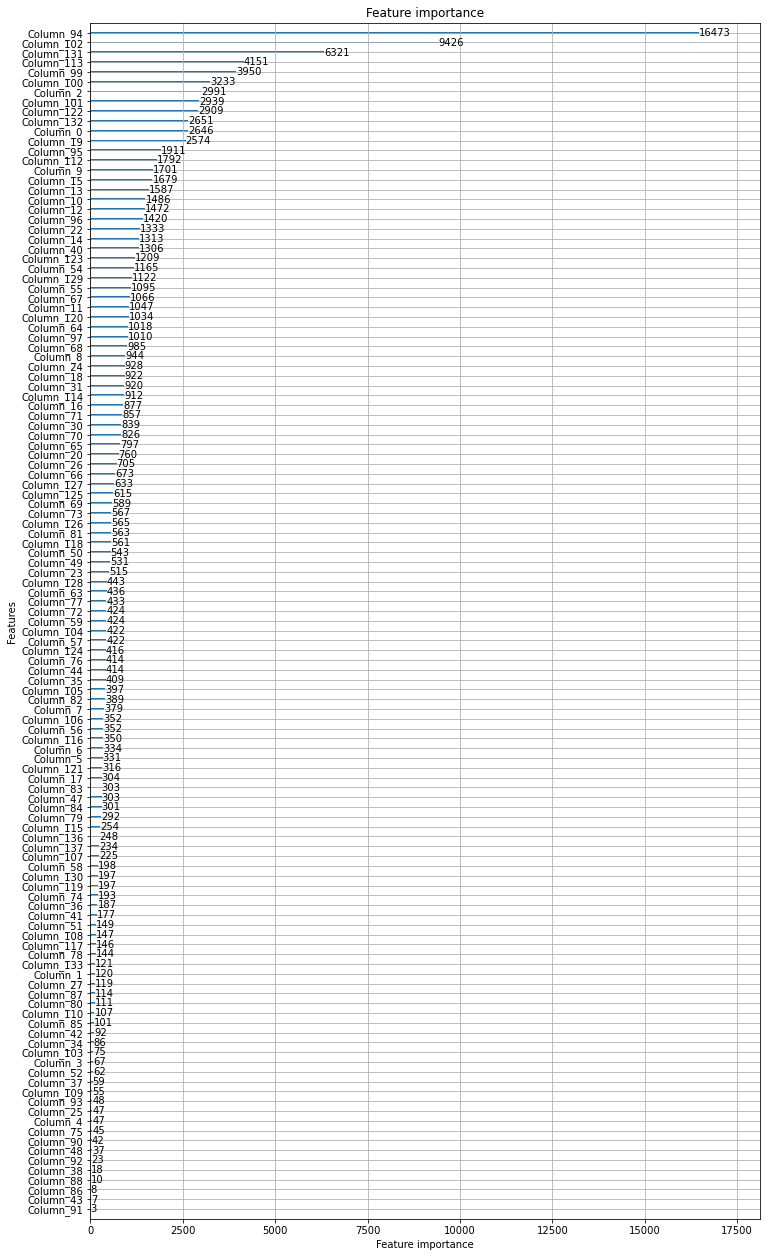

In [35]:
lightgbm.plot_importance(clf,figsize=(12,22))

#### check here if SMOTE changes anything in the pipeline. I keep the balanced setting for the classifier. maybe SMOTE does some prework in a better way

In [36]:
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.impute import SimpleImputer
import numpy as np

df_train=pd.read_csv('train.csv')

df_train_bak=df_train.copy()

#copy the model
clf = copy(model)

# imputer - try simply to put the mean for missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')  

#oversample undersampled datasets
borderline = BorderlineSMOTE(random_state=88)

#encode non numeric values
encode = FranksTransformer_Encoder()

#create na column to indicate null-values
na_columns=FranksTransformer_NaColumns(do_copy=False)

#drop the columns not needed (SQB-columns and the ID column)
drop_columns=FranksTransformer_Dropper(do_copy=False,additional_columns=['Id'])

grid = {'class__n_estimators': [500,600,700],
        'class__num_leaves':[70,80]
        ,'class__class_weight':['balanced']
        }
#pipeline = Pipeline([('imputer',imp_mean),('sampling', borderline), ('class', clf)])
pipeline = Pipeline([('dropcolumns',drop_columns),
                     ('nacolumns',na_columns),
                     ('encode',encode),
                     ('imputer',imp_mean),
                     ('borderline', borderline),  #this line is added
                     ('class', clf)])

#do the train test split
X, y = df_train_bak.drop(['Target'], axis=1), df_train_bak['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#pipeline.fit(X_train,y_train)
#pipeline.predict(X_test)
#
grid_cv = GridSearchCV(pipeline, grid, scoring = 'f1_macro', cv = 5, n_jobs=3,refit=True,verbose=1)
   
grid_cv.fit(X_train, y_train)
display(grid_cv.best_score_, grid_cv.best_params_)

Franks Transformer Encoder
Franks Transformer NaColumns
Franks Transformer Dropper
Franks Transformer Dropper
Franks Transformer NaColumns
Franks Transformer Encoder
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Franks Transformer Dropper
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper
Franks Transformer NaColumns
Franks Transformer Encoder
Franks Transformer Dropper


/Users/lacherf/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.8856878690258057

{'class__class_weight': 'balanced',
 'class__n_estimators': 700,
 'class__num_leaves': 80}

In [37]:
pipeline.set_params(**grid_cv.best_params_)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)#[:, 1]

confusion = confusion_matrix(y_test, y_pred)
print("F1-Score macro: {}".format(f1_score(y_test,y_pred,average='macro')))
df_conf = pd.DataFrame(confusion,columns=['1','2','3','4'],index=['1','2','3','4'])
df_conf

Franks Transformer Dropper: transforming
Franks Transformer Dropper: SQcolumns dropped
Franks Transformer NaColumns: transforming
Franks Transformer NaColumns: New columns appended
Franks Transformer Encoder: Columns encoded
Franks Transformer Encoder: transforming


/Users/lacherf/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Franks Transformer Dropper: transforming
Franks Transformer Dropper: SQcolumns dropped
Franks Transformer NaColumns: transforming
Franks Transformer NaColumns: New columns appended
Franks Transformer Encoder: transforming
F1-Score macro: 0.9293045317773272


,1,2,3,4
1,137,7,0,5
2,12,283,8,17
3,0,9,216,22
4,1,4,2,1189


### Do the prediction for the final set that was asked
This would be a first result for the challenge to transmit

In [38]:
y_pred_final=pipeline.predict(df_test)

Franks Transformer Dropper: transforming
Franks Transformer Dropper: SQcolumns dropped
Franks Transformer NaColumns: transforming
Franks Transformer NaColumns: New columns appended
Franks Transformer Encoder: transforming


In [39]:
df_endresult=pd.DataFrame()
df_endresult['Id']=df_test['Id']
df_endresult['Target']=y_pred_final
df_endresult.set_index('Id',inplace=True)
df_endresult.to_csv(path_or_buf='endresult1.csv')
df_endresult

,Target
Id,
ID_2f6873615,4
ID_1c78846d2,4
ID_e5442cf6a,4
ID_a8db26a79,4
ID_a62966799,4
...,...
ID_a065a7cad,2
ID_1a7c6953b,4
ID_07dbb4be2,4


# Try some automl

Her H2O was choosen, as auto-sklearn resisted to install on my Mac. Important for H2O: Install Java JRE on your machine and run the process as it is performed in the java-program. Python communicates with it.

In [6]:
!pip install requests

In [7]:
!pip install tabulate

In [8]:
!pip install "colorama>=0.3.8"

In [9]:
!pip install future

In [10]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 164.8 MB 11.0 MB/s eta 0:00:01
  Created wheel for h2o: filename=h2o-3.32.1.4-py2.py3-none-any.whl size=164871668 sha256=1838d7519e0de2d70f7dde9d75524aa5450a519067a152976659c34008648cba
  Stored in directory: /Users/lacherf/Library/Caches/pip/wheels/7e/18/26/bee4909adb7fc0dbf434a225857665ac9bd80ba61a0743c14a
Successfully built h2o


In [13]:
!conda install h2oai h2o


UnavailableInvalidChannel: The channel is not accessible or is invalid.
  channel name: simple
  channel url: https://pypi.python.org/simple
  error code: 404

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.




##### run the automl process of H2O

In [70]:
import h2o
h2o.init()
from h2o.automl import H2OAutoML

# import the train dataset
my_train = h2o.import_file('train.csv')

# split into train and testing sets, convert target to 'factor'
train_automl, test_automl = my_train.split_frame(ratios = [0.8], seed = 1234)
train_automl['Target']=train_automl['Target'].asfactor()
test_automl['Target']=test_automl['Target'].asfactor()
columns=train_automl.columns
columns.remove('Target')
columns.remove('Id')
columns.remove('idhogar')

#aml=H2OAutoML(max_models=20,seed=1,max_runtime_secs=600)
aml.train(x=train_automl.columns.remove('Target'),y='Target',training_frame=train_automl)

lb=aml.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,12 hours 39 mins
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,18 days
H2O_cluster_name:,lacherf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.009 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
08:04:14.110: New models will be added to existing leaderboard AutoML_20210727_73530539@@Target (leaderboard frame=null) with already 22 models.

███████████████████████████████████████████████████
08:13:29.62: StackedEnsemble_BestOfFamily_AutoML_20210727_080414 [StackedEnsemble best (built using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.

█
08:13:30.66: StackedEnsemble_AllModels_AutoML_20210727_080414 [StackedEnsemble all (built using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.

████| 100%


model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
StackedEnsemble_AllModels_AutoML_20210727_073530,0.0937331,0.174612,0.217129,0.0471451,nan,nan
StackedEnsemble_BestOfFamily_AutoML_20210727_073530,0.0950795,0.177251,0.219017,0.0479686,nan,nan
GBM_grid__1_AutoML_20210727_080414_model_1,0.106352,0.196901,0.221703,0.0491524,nan,nan
GBM_grid__1_AutoML_20210727_073530_model_1,0.107256,0.196684,0.221205,0.0489315,nan,nan
GBM_grid__1_AutoML_20210727_073530_model_2,0.168645,0.462586,0.378826,0.143509,nan,nan
GBM_grid__1_AutoML_20210727_080414_model_2,0.171158,0.48076,0.388276,0.150758,nan,nan
DRF_1_AutoML_20210727_073530,0.191606,0.411341,0.339042,0.114949,nan,nan
GBM_4_AutoML_20210727_073530,0.19275,0.440226,0.368486,0.135782,nan,nan
GBM_4_AutoML_20210727_080414,0.193264,0.444294,0.370793,0.137487,nan,nan
DRF_1_AutoML_20210727_080414,0.195266,0.412153,0.339602,0.11533,nan,nan


In [58]:
test_automl.tail()

Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
ID_5e06f0d81,0,0,4,0,1,1,0,nan,1,1,2,2,2,4,3,3,6,6,6,2,1,6,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,c7ce4e30c,4,2,0,6,2,2,no,3,0,1,0,0,0,0,0,0,0,2,3,0,1,0,0,0,0,0,1,3,0,0,0,0,0,1,0,1,10,4,100,36,4,16,9,4,9,100,2
ID_03988ba1b,nan,0,2,0,1,1,0,nan,1,0,1,0,2,2,1,2,3,3,3,7,nan,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,c91fc39d8,2,1,0,3,2,nan,7,7,0,0,0,1,0,0,0,0,0,1,3,0,0,0,0,1,0,0,1,3,0,0,0,0,0,1,0,1,29,49,841,9,0,4,9,4,49,841,2
ID_482814b64,30000,0,5,0,1,1,0,nan,0,1,1,0,1,1,0,2,2,2,2,9,nan,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,76ca7bf61,0,2,0,2,nan,nan,9,9,0,0,0,1,0,0,0,0,0,3,0.666667,0,0,1,0,0,0,0,1,2,0,0,0,0,0,1,0,1,20,81,400,4,0,0,0.444444,0,81,400,4
ID_62105bff6,nan,0,7,0,1,1,1,1,0,1,1,0,1,1,0,2,2,2,2,6,nan,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,95321ad13,0,2,1,2,nan,6,no,6,0,0,1,0,0,0,0,0,0,4,0.5,1,0,0,0,0,0,1,1,2,0,0,0,0,0,1,0,1,61,36,3721,4,36,0,0.25,1,36,3721,4
ID_92b30d94b,nan,0,5,0,1,1,0,nan,2,1,3,0,1,1,2,2,4,4,4,0,nan,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,fef7fd222,2,2,0,4,nan,8,no,9.5,1,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,1,0,1,16,64,4,4,1,90.25,1,4
ID_8d3963fff,nan,0,7,0,1,1,0,nan,0,1,1,0,0,0,0,1,1,1,1,4,nan,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,b58de0516,0,1,1,1,8,4,no,4,0,1,0,0,0,0,0,0,0,3,0.333333,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,74,16,5476,1,16,0,0.111111,64,16,5476,3
ID_d20bd7576,nan,0,4,0,1,0,0,nan,1,1,2,2,1,3,3,2,5,5,5,0,1,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9bbf7c6ca,3,2,0,5,1.5,nan,5,4.5,1,0,0,0,0,0,0,0,0,2,2.5,1,0,0,0,0,0,1,1,2,0,0,0,0,0,1,0,1,8,0,64,25,0,9,6.25,2.25,20.25,64,2
ID_a31274054,nan,0,3,0,0,0,0,nan,2,2,4,0,1,1,2,3,5,5,5,2,nan,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,e87e70c06,3,2,0,5,1.5,2,no,4,0,1,0,0,0,0,0,0,0,2,2.5,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,40,4,1600,25,4,9,6.25,2.25,16,1600,2
ID_fc

In [71]:
df_a=aml.leader.predict(test_automl)
aml.leader.predict(test_automl.tail(5))

stackedensemble prediction progress: |████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p1,p2,p3,p4
3,0.0632699,0.13786,0.659662,0.139208
2,0.0414116,0.955156,0.00302159,0.000410653
2,0.0532539,0.939568,0.00642483,0.000753165
2,0.04207,0.948923,0.00860815,0.000399366
2,0.0186782,0.974985,0.00608299,0.000253531


In [72]:
y_pred_automl=df_a.as_data_frame()['predict']

0       4
1       4
2       4
3       4
4       4
       ..
1872    3
1873    2
1874    2
1875    2
1876    2
Name: predict, Length: 1877, dtype: int64

In [73]:
aml.leader.confusion_matrix(train_automl)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,Error,Rate
0,622.0,0.0,0.0,0.0,0.0,0 / 622
1,0.0,1284.0,0.0,0.0,0.0,0 / 1'284
2,0.0,0.0,982.0,0.0,0.0,0 / 982
3,0.0,0.0,0.0,4792.0,0.0,0 / 4'792
4,622.0,1284.0,982.0,4792.0,0.0,0 / 7'680


In [74]:
aml.leader.confusion_matrix(test_automl)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,Error,Rate
0,125.0,5.0,0.0,3.0,0.060150,8 / 133
1,4.0,286.0,8.0,15.0,0.086262,27 / 313
2,2.0,5.0,199.0,21.0,0.123348,28 / 227
3,0.0,1.0,3.0,1200.0,0.003322,4 / 1'204
4,131.0,297.0,210.0,1239.0,0.035695,67 / 1'877


#### confusion matrix looks quite similar to the own findings with lightgbm, but there seems to be a bug with the numbering of the indexes - anyhow it is understandable

In [75]:
aml.leader.actual_params

{'model_id': 'StackedEnsemble_AllModels_AutoML_20210727_073530',
 'training_frame': 'automl_training_py_915_sid_8f43',
 'response_column': 'Target',
 'validation_frame': None,
 'blending_frame': None,
 'base_models': [{'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_grid__1_AutoML_20210727_073530_model_1',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_grid__1_AutoML_20210727_073530_model_2',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'DRF_1_AutoML_20210727_073530',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_4_AutoML_20210727_073530',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_versio

# From here on it is playground to keep code segments that where used during playing

### Additional test on data: Question if Target variable is consistent across households or if different people say different things that it is rated wrongly, or with another view if the prediction of a member of the household could improve the prediction of the person

In [55]:
maxi=df_train.groupby('idhogar')['Target'].min()
mini=df_train.groupby('idhogar')['Target'].max()
avg=df_train.groupby('idhogar')['Target'].mean()
df_mini_maxi=pd.DataFrame([maxi,mini,avg],index=['T1','T2','T3'])
df_mini_maxi=df_mini_maxi.T
df_mini_maxi['diff']=df_mini_maxi['T1']-df_mini_maxi['T2']
df_mini_maxi.loc[df_mini_maxi['diff']!=0,:]

,T1,T2,T3,diff
idhogar,,,,
0172ab1d9,2.0,3.0,2.600000,-1.0
03f4e5f4d,1.0,2.0,1.333333,-1.0
0511912b6,3.0,4.0,3.750000,-1.0
078a0b6e2,1.0,2.0,1.500000,-1.0
09e25d616,1.0,2.0,1.750000,-1.0
0f3e65c83,1.0,2.0,1.333333,-1.0
0f9494d3a,2.0,3.0,2.600000,-1.0
15a891635,1.0,2.0,1.666667,-1.0
17fb04a62,1.0,2.0,1.333333,-1.0


<B>Finding:</B> Target variable is very similar in a houshold (differnce of max and min of the target in the household if it exists at all is almost one always).
Have a look at some data

In [56]:
df_train.loc[df_train['idhogar']=='f94589d38',:]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
8793,ID_783383eb6,NaN,0,4,0,1,1,0,NaN,2,0,2,0,1,1,2,1,3,3,3,0,0.0,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,f94589d38,2,1,0,3,2,no,10,10.0,1,0,0,0,0,0,0,0,0,2,1.5,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,7,0,49,9,0,4,2.25,4.0,100.0,49,2
8794,ID_a160b1135,NaN,0,4,0,1,1,0,NaN,2,0,2,0,1,1,2,1,3,3,3,0,NaN,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,f94589d38,2,1,0,3,2,no,10,10.0,1,0,0,0,0,0,0,0,0,2,1.5,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,5,0,25,9,0,4,2.25,4.0,100.0,25,2
8795,ID_81c004cc5,NaN,0,4,0,1,1,0,NaN,2,0,2,0,1,1,2,1,3,3,3,10,NaN,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,f94589d38,2,1,0,3,2,no,10,10.0,0,0,0,1,0,0,0,0,0,2,1.5,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,26,100,676,9,0,4,2.25,4.0,100.0,676,1


In [57]:
df_train.loc[df_train['idhogar'].isin(df_mini_maxi.loc[df_mini_maxi['diff']!=0,:].index),['Id','age','male','female','idhogar','Target']]

,Id,age,male,female,idhogar,Target
282,ID_b1fb0180e,22,0,1,4b6077882,1
283,ID_17d9dcd44,7,0,1,4b6077882,2
284,ID_e78621924,2,0,1,4b6077882,2
285,ID_2be4f2db1,18,0,1,6833ac5dc,2
286,ID_1c3ec2768,1,0,1,6833ac5dc,2
287,ID_b859b2f59,30,1,0,6833ac5dc,2
288,ID_4f08bbe09,36,0,1,6833ac5dc,2
289,ID_6dea84d09,18,1,0,6833ac5dc,2
290,ID_606ed140f,16,0,1,6833ac5dc,1
318,ID_474ec6c27,2,0,1,43b9c83e5,2


(0.0, 1000000.0)

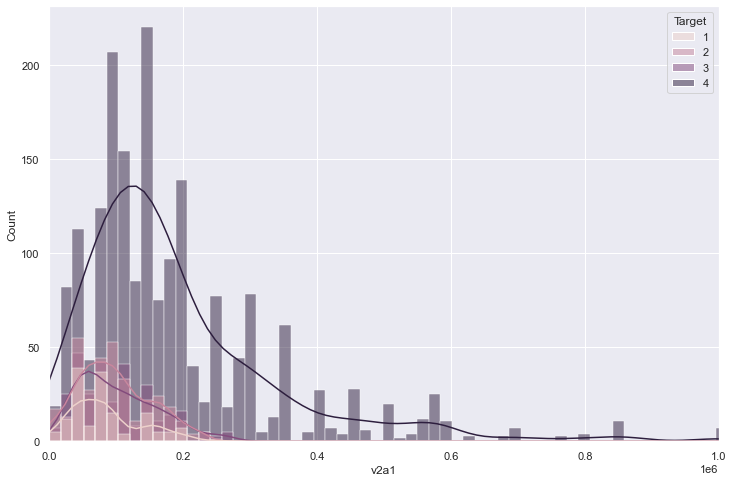

In [87]:
sns.set(rc={'figure.figsize':(12,8)})
ax=sns.histplot(df_train,x='v2a1',hue='Target',kde=True)
ax.set_xlim(0,1000000)

In [129]:
df_train['4Kind']=(df_train.groupby('idhogar')['male'].count()==4)
df_train.loc[df_train['idhogar'].isin(list(df_train.groupby('idhogar').count()['male'])),:]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,4Kind


In [166]:
a=df_train.groupby('idhogar')
print(type(a))
b=a.loc[a.values==True].index
df_train.loc[df_train['idhogar'].isin(b),:]

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


AttributeError: 'DataFrameGroupBy' object has no attribute 'loc'

In [168]:
import pandas.core.groupby.generic
DataFrameGroupBy.

In [117]:
df_train[df_train['idhogar'].isin((df_train.groupby('idhogar')['male'].count()==4).index)]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,9,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6c086aa3,1,4,0,5,.25,9,

In [ ]:
#df_train.loc[df_train['idhogar'].isin(df_mini_maxi.loc[df_mini_maxi['diff']!=0,:].index),['Id','age','male','female','idhogar','Target']]

### Additional check on imputation of data. A mean strategy might be to simple. 
v2a1 is an important variable because according to featureimportance. So may be worth to check if anybody of a household has a value and use that
Monthly rent payment:v2a1 -> 6860
number of tablets household owns:v18q1 -> 7342
Years behind in school:rez_esc -> 7928

Try also with oversampling and BorderlineSMOTE (not sure how good 'multiclass' is in lightgbm) impute the values. impute the values with 

In [127]:
pipeline.set_params(**grid_cv.best_params_)
pipeline.fit(X_cleaned, y_train)
y_pred = pipeline.predict(X_ttest)#[:, 1]

confusion = confusion_matrix(y_test, y_pred)
df_conf = pd.DataFrame(confusion,columns=['1','2','3','4'],index=['1','2','3','4'])
df_conf

,1,2,3,4
1,125,7,0,13
2,9,284,14,12
3,0,13,221,16
4,1,4,6,1187


print("F1-Score macro: {}".format(f1_score(y_test,y_pred,average='macro')))

from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import BorderlineSMOTE
import numpy as np
clf = copy(model)
#clf.set_params(num_leaves=31)
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
borderline = BorderlineSMOTE(random_state=88)
grid = {'class__n_estimators': [500],
        'class__num_leaves':[70],
        'class__class_weight':['balanced',None]
        
        }
#pipeline = Pipeline([('imputer',imp_mean),('sampling', borderline), ('class', clf)])
pipeline = Pipeline([('imputer',imp_mean), ('class', clf)])
#pipeline = Pipeline([('class', clf)])
grid_cv = GridSearchCV(pipeline, grid, scoring = 'f1_macro', cv = 3, n_jobs=3,refit=True)
   
grid_cv.fit(X_cleaned, y_train)
display(grid_cv.best_score_, grid_cv.best_params_)

pipeline.set_params(**grid_cv.best_params_)
pipeline.fit(X_cleaned, y_train)
y_pred = pipeline.predict(X_ttest)#[:, 1]

confusion = confusion_matrix(y_test, y_pred)
df_conf = pd.DataFrame(confusion,columns=['1','2','3','4'],index=['1','2','3','4'])
df_conf